In [1]:
from sklearn import datasets
import numpy as np

In [2]:
mnist= datasets.load_digits()

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
set(mnist.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
mnist.data.shape

(1797, 64)

In [6]:
mnist.images.shape

(1797, 8, 8)

In [7]:
y_all=mnist.target.copy()

In [8]:
for i in range(len(y_all)):
    if(y_all[i]==1):
        y_all[i]=True
    elif(y_all[i]==7):
        y_all[i]=True
    else:
        y_all[i]=False

In [9]:
rows=(y_all==True)

In [10]:
x=mnist.data[rows]
y_actual=mnist.target[rows]

In [11]:
y=y_actual.copy()
for i in range(len(y_actual)):
    if(y_actual[i]==1):
        y[i]=0
    else:
        y[i]=1
    

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train ,y_test=train_test_split(x, y)

In [13]:
x_train=x_train/256.0

In [14]:
y_train=y_train.reshape(-1,1)

In [15]:
x_test=x_test/256.0

In [16]:
def sig(z):
    return 1/(1+np.exp(-z))

In [17]:
def derivSig(z):
    return sig(z)*(1 - sig(z))

In [18]:
units_hidden_layer1= 50
units_hidden_layer2= 30

In [19]:
wh1 = 2 * np.random.random((64, units_hidden_layer1)) - 1
bh1 = np.random.random((1, units_hidden_layer1))* 2 - 1
wh2 = 2 * np.random.random((units_hidden_layer1 , units_hidden_layer2)) - 1
bh2 = np.random.random((1, units_hidden_layer2))* 2 - 1
wo = 2 * np.random.random((units_hidden_layer2,1)) - 1
bo = np.random.random([1,1])* 2 - 1

In [20]:
def forward(x, wh1, wh2, bh1, bh2, wo, bo):
    output0=x
    input_hidden_layer1 = output0.dot(wh1)+bh1
    output_hidden_layer1= sig(input_hidden_layer1)
    input_hidden_layer2 = output_hidden_layer1.dot(wh2) + bh2
    output_hidden_layer2= sig(input_hidden_layer2)
    input_output_layer = np.dot(output_hidden_layer2 , wo)+bo
    output= sig(input_output_layer)
    return output

In [21]:
def train(x, y, wh1, wh2, bh1, bh2, wo, bo, lr, iterations):
    output0=x
    input_hidden_layer1 = output0.dot(wh1)+bh1
    output_hidden_layer1= sig(input_hidden_layer1)
    input_hidden_layer2 = output_hidden_layer1.dot(wh2) + bh2
    output_hidden_layer2= sig(input_hidden_layer2)
    input_output_layer = np.dot(output_hidden_layer2 , wo)+bo
    output= sig(input_output_layer)
    
    first_term_output=output-y
    sec_term_output=derivSig(input_output_layer)
    first_two_terms_output=first_term_output * sec_term_output
    
    sec_term_hidden2=derivSig(input_hidden_layer2 )
    first_term_hidden2=first_two_terms_output.dot(wo.T)
    first_two_terms_hidden2=first_term_hidden2 * sec_term_hidden2
    
    sec_term_hidden1= derivSig( input_hidden_layer1 )
    first_term_hidden1=first_two_terms_hidden2.dot(wh2.T)
    first_two_terms_hidden1=sec_term_hidden1 * first_term_hidden1
    
    changes_wo = np.dot(output_hidden_layer2.T, first_two_terms_output)
    changes_wh2 = np.dot(output_hidden_layer1.T, first_two_terms_hidden2)
    changes_wh1 = np.dot(output0.T, first_two_terms_hidden1)
    
    wh1 = wh1 - lr * changes_wh1
    wh2 = wh2 - lr * changes_wh2
    wo  = wo  - lr * changes_wo

    changes_bh1 = np.sum(first_two_terms_hidden1, axis = 0)
    changes_bh2 = np.sum(first_two_terms_hidden2, axis = 0)
    changes_bo = np.sum(first_two_terms_output, axis = 0)

    bh1 = bh1 - lr * changes_bh1
    bh2 = bh2 - lr * changes_bh2
    bo = bo - lr*changes_bo
    return wh1 , wh2, bh1, bh2 ,wo ,bo

In [22]:
wh1 , wh2, bh1, bh2 ,wo ,bo = train(x_train, y_train, wh1, wh2, bh1, bh2, wo, bo, lr=0.001, iterations=100000)

In [23]:
obj=forward(x_test,wh1, wh2, bh1, bh2, wo, bo)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
def predict(array):
    y_pred=[]
    for i in range(len(array)):
        if(array[i]<0.5):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [26]:
y_pred_without_scaling=predict(obj)

In [27]:
accuracy_score(y_pred_without_scaling,y_test)

0.46153846153846156

In [28]:
mnist.images.shape

(1797, 8, 8)

In [29]:
# AFTER SCALINGGGG

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [32]:
wh1 , wh2, bh1, bh2 ,wo ,bo = train(x_train_scaled, y_train, wh1, wh2, bh1, bh2, wo, bo, lr=0.01, iterations=10000)

In [33]:
array_scaled=forward(x_test_scaled,wh1, wh2, bh1, bh2, wo, bo)

In [34]:
y_pred_scaled=predict(array_scaled)

In [35]:
accuracy_score(y_test,y_pred_scaled)

0.7032967032967034

In [36]:
import matplotlib.pyplot as plt

In [37]:
x_train_images=x_train.reshape(-1,8,8)

In [38]:
x_train_scaled_images=x_train_scaled.reshape(-1,8,8)

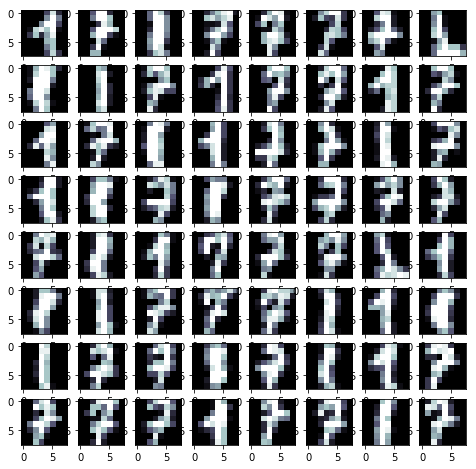

In [39]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(x_train_images[i+30],cmap=plt.cm.bone)
plt.show()

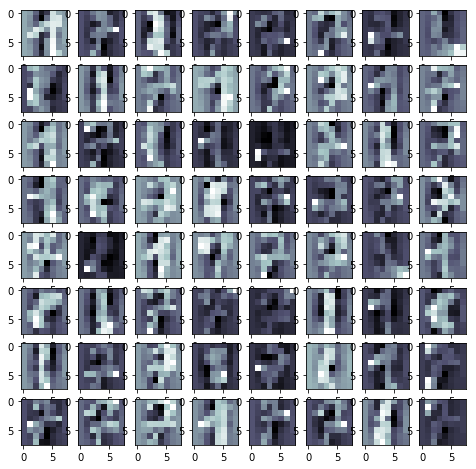

In [40]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(x_train_scaled_images[i+30],cmap=plt.cm.bone)
plt.show()